Download MNIST dataset.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

C:\Users\User\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

X = mnist.data
y = mnist.target

#split the data into train and test set with 85-15 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

#Count and print the instances of each class
class_train , count_train = np.unique(y_train, return_counts=True)
class_test , count_test = np.unique(y_test, return_counts=True)

print("Training Set")
for cl , cnt in zip(class_train , count_train):
    print(f"Class {cl} has {cnt} instances, i.e. {round((cnt/len(y_train))*100, 2)}% of the train set.")

print("")

print("Test Set")
for cl , cnt in zip(class_test , count_test):
    print(f"Class {cl} has {cnt} instances, i.e. {round((cnt/len(y_test))*100, 2)}% of the test set.")

Training Set
Class 0 has 5868 instances, i.e. 9.86% of the train set.
Class 1 has 6695 instances, i.e. 11.25% of the train set.
Class 2 has 5942 instances, i.e. 9.99% of the train set.
Class 3 has 6070 instances, i.e. 10.2% of the train set.
Class 4 has 5800 instances, i.e. 9.75% of the train set.
Class 5 has 5366 instances, i.e. 9.02% of the train set.
Class 6 has 5845 instances, i.e. 9.82% of the train set.
Class 7 has 6199 instances, i.e. 10.42% of the train set.
Class 8 has 5801 instances, i.e. 9.75% of the train set.
Class 9 has 5914 instances, i.e. 9.94% of the train set.

Test Set
Class 0 has 1035 instances, i.e. 9.86% of the test set.
Class 1 has 1182 instances, i.e. 11.26% of the test set.
Class 2 has 1048 instances, i.e. 9.98% of the test set.
Class 3 has 1071 instances, i.e. 10.2% of the test set.
Class 4 has 1024 instances, i.e. 9.75% of the test set.
Class 5 has 947 instances, i.e. 9.02% of the test set.
Class 6 has 1031 instances, i.e. 9.82% of the test set.
Class 7 has 1

Depict the first 8 images of training and test set.

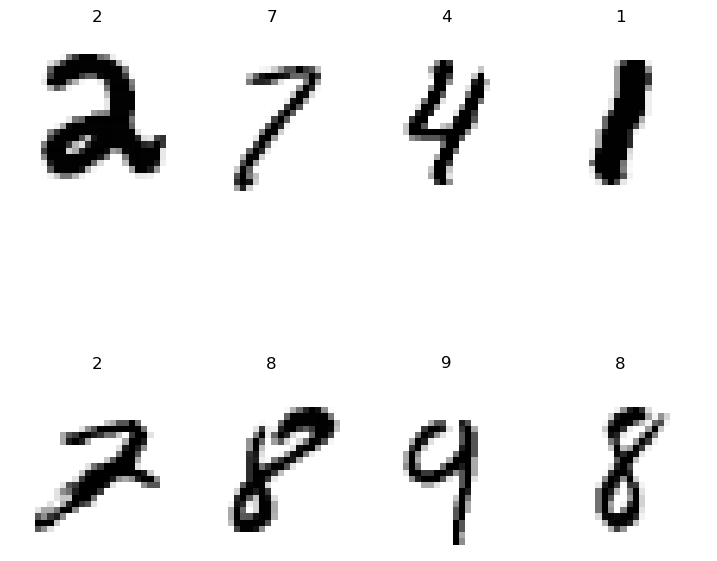

In [7]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

#first 8 images of training set
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_train[:8]):
    plt.subplot(2, 4, idx + 1)
    plot_digit(image_data)
    plt.title(y_train[idx]) #einai sosto??
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

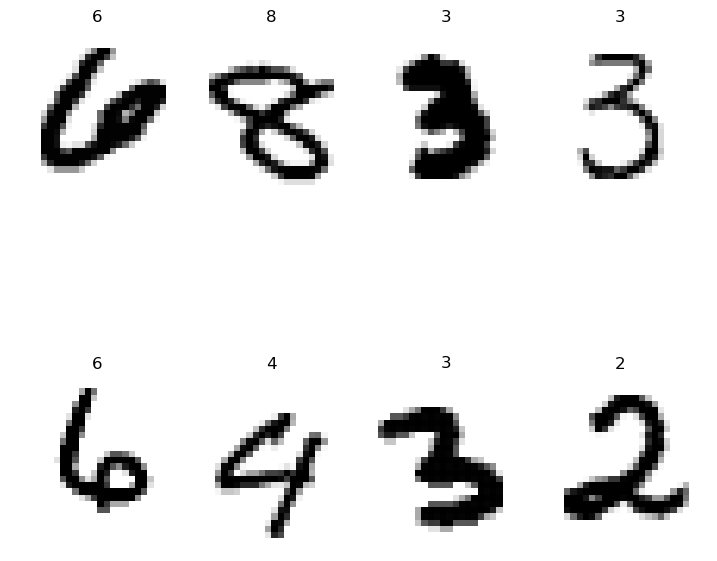

In [8]:
#first 8 images of test set
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_test[:8]):
    plt.subplot(2, 4, idx + 1)
    plot_digit(image_data)
    plt.title(y_test[idx])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Create a pipeline that normalize the data and uses Stochastic Gradient Descent as the binary classifier.

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier #extra
from sklearn.linear_model import SGDClassifier

#Create training / test subsets and convert it to binary labels
#0 for even, 1 for odd
y_train_binary = np.where(y_train.astype('int8') % 2 == 0, 0, 1)
y_test_binary = np.where(y_test.astype('int8') % 2 == 0, 0, 1)

#Choose normalization technique and binary classifier
std_scaler = StandardScaler()
sgd_clf = SGDClassifier(random_state=42)

#Make a pipeline with the above
even_odd_clf = make_pipeline(std_scaler, sgd_clf)

even_odd_clf.fit(X_train, y_train_binary)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

Perform 3-fold cross-validation on the training set and compute accuracy, precision, and recall.
Compare performance against a dummy model that always predicts "even".

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

#3-fold cross validation to evaluate the pipeline
#Accuracy
accuracy = cross_val_score(even_odd_clf, X_train, y_train_binary, cv=3, scoring="accuracy")
print(f"The accuracy is : {accuracy.mean()}")

y_train_pred = cross_val_predict(even_odd_clf, X_train, y_train_binary, cv=3)

#Precision
prcsn = precision_score(y_train_binary, y_train_pred)
print(f"The precision is : {prcsn}")

#Recall
recall = recall_score(y_train_binary, y_train_pred)
print(f"The recall is : {recall}")

The accuracy is : 0.8832605445276808
The precision is : 0.8817842160461458
The recall is : 0.8895979367808491


In [12]:
#Dummy classifier that always predictive even
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="constant", constant=0)
dummy_clf.fit(X_train, y_train_binary)
print(any(dummy_clf.predict(X_train)))

False


So it predicts only even.

In [13]:
accuracy_dummy = cross_val_score(dummy_clf, X_train, y_train_binary, cv=3, scoring="accuracy")
print(f"The accuracy of the dummy classifier is : {accuracy_dummy.mean()}")

y_train_pred_dummy = cross_val_predict(dummy_clf, X_train, y_train_binary, cv=3)
dummy_precision = precision_score(y_train_binary, y_train_pred_dummy)
dummy_recall = recall_score(y_train_binary, y_train_pred_dummy)
print(f"The precision of the dummy classifier is : {dummy_precision}")
print(f"The recall of the dummy classifier is : {dummy_recall}")

The accuracy of the dummy classifier is : 0.4916974792693676
The precision of the dummy classifier is : 0.0
The recall of the dummy classifier is : 0.0


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The metrics of the dummy classifier are expected since its predictions are even every time.
<br>
So our original model has a better predictive perfomance.

Compute the confusion matrix after 3-fold CV.

In [14]:
from sklearn.metrics import confusion_matrix

#Calculate the confusion matrix
cm = confusion_matrix(y_train_binary, y_train_pred)
print("The confusion matrix is :")
print(cm, "\n")

#Record the kind and amount of predictions
print("Predictions (Kind and Amount):")
print(f"True Negatives : {cm[0,0]}")
print(f"True Positives : {cm[1,1]}")
print(f"False Negatives : {cm[1,0]}")
print(f"False Positives : {cm[0,1]}")

The confusion matrix is :
[[25649  3607]
 [ 3339 26905]] 

Predictions (Kind and Amount):
True Negatives : 25649
True Positives : 26905
False Negatives : 3339
False Positives : 3607


Retrain the pipeline on the full training set and Make predictions on the test set.<br>
Compute a new confusion matrix and compare test performance to training.

In [17]:
#Train the pipeline on the training set
even_odd_clf.fit(X_train, y_train_binary)

#Getpredictions based on the test set
predicts = even_odd_clf.predict(X_test)

#Calculate the confusion matrix
cm_test = confusion_matrix(y_test_binary, predicts)
print("The confusion matrix is :")
print(cm_test, "\n")

The confusion matrix is :
[[4590  572]
 [ 572 4766]] 



In [45]:
from sklearn.metrics import accuracy_score

#Calculate new metrics
testAcc = accuracy_score(predicts, y_test_binary)
testPre = precision_score(predicts, y_test_binary)
testRec = recall_score(predicts, y_test_binary)

print(f"Accuracy : {testAcc}")
print(f"Precision : {testPre}")
print(f"Recall : {testRec} \n")

#Calculate the differences of the metrics between the two models
print(f"Difference of Accuracy : {round(abs(testAcc - accuracy.mean()), 3)}")
print(f"Difference of Precision : {round(abs(testPre - prcsn), 3)}")
print(f"Difference of Recall : {round(abs(testRec - recall), 3)}")

Accuracy : 0.8910476190476191
Precision : 0.8928437617085051
Recall : 0.8928437617085051 

Difference of Accuracy : 0.008
Difference of Precision : 0.011
Difference of Recall : 0.003


We see that the results of the two models are basically the same.

Display a random misclassified image of false positive and false negative from the test set.

False Negative


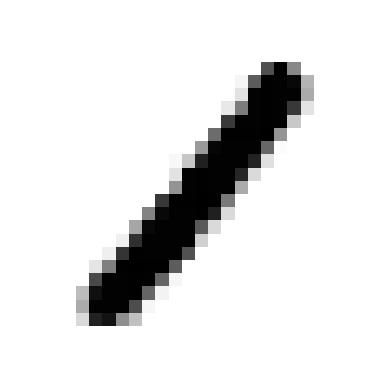

False Positive


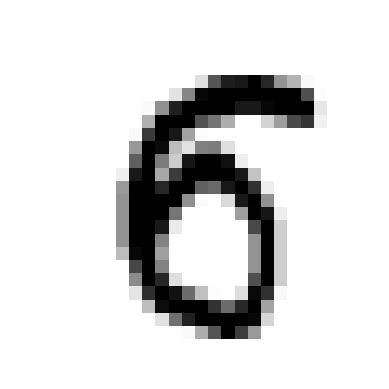

In [26]:
import random

#Find the sets of False Negatives and False Positives
falseNeg = X_test[(y_test_binary == 1) & (predicts == 0)]
falsePos = X_test[(y_test_binary == 0) & (predicts == 1)]

#Pick a random item from each set
randomFN = random.choice(list(falseNeg))
randomFP = random.choice(list(falsePos))

print("False Negative")
plot_digit(randomFN)
plt.show()

print("False Positive")
plot_digit(randomFP)
plt.show()